<a href="https://colab.research.google.com/github/havihavish/Big_Data_Visualization/blob/master/count_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
df=pd.read_csv('Final_Table_3.csv',low_memory=False)

In [0]:
df.head()

,Unnamed: 0,article_id,paperId,doi,title,venue,year,intent,isInfluential
0,0,10.1145/511285.511288,8113edc6c95508bc7f9ae624903f8f4c98d3395b,10.1007/BF01007763,Relevance of computer science to linguistics a...,International Journal of Computer & Informatio...,1975.0,NaN,False
1,1,10.1145/511285.511288,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
2,2,10.1145/511285.511288,28dd43a10b78cc6297081fb7b9be86e114894391,10.1145/1095515.1095516,Information storage and retrieval: a survey an...,SIGF,1977.0,NaN,False
3,3,10.1145/511285.511288,24f73ab2828f9aecbc079a9d5f5028c392eaa5b0,10.1002/asi.4630290207,Automatic indexing of pathology data,JASIS,1978.0,NaN,False
4,4,10.1145/511285.511288,393a9de965783f2c0f42b82db47321df10402472,10.1007/BF00998326,Simple-english for data base communication,International Journal of Computer & Informatio...,1977.0,background,False


In [0]:
df.dtypes

Unnamed: 0         int64
article_id        object
paperId           object
doi               object
title             object
venue             object
year             float64
intent            object
isInfluential       bool
dtype: object

In [0]:
y=df.groupby('year')


In [0]:
y.get_group(1975.0)

,Unnamed: 0,article_id,paperId,doi,title,venue,year,intent,isInfluential
0,0,10.1145/511285.511288,8113edc6c95508bc7f9ae624903f8f4c98d3395b,10.1007/BF01007763,Relevance of computer science to linguistics a...,International Journal of Computer & Informatio...,1975.0,NaN,False
11,11,10.1145/511285.511290,7ec642a8dd038eece16cc63988b0daf74e83b576,10.1145/1499949.1500028,A multi-level relational system,AFIPS '75,1975.0,NaN,False
18,18,10.1145/511285.511290,bf6d299619c7a4ce81023bf2cd75c730a25ce5a1,NaN,TORUS - A Natural Language Understanding Syste...,IJCAI,1975.0,NaN,False


In [0]:
df.groupby('year').size()

year
1959.0        1
1971.0        2
1972.0        2
1973.0       10
1974.0        2
1975.0        3
1976.0        2
1977.0        8
1978.0        2
1979.0        6
1980.0        5
1981.0        3
1982.0        5
1983.0        7
1984.0        3
1985.0       16
1986.0       23
1987.0       46
1988.0       68
1989.0      112
1990.0       66
1991.0      129
1992.0      230
1993.0      260
1994.0      390
1995.0      468
1996.0      592
1997.0      757
1998.0     1118
1999.0     1298
2000.0     1795
2001.0     1969
2002.0     2583
2003.0     3042
2004.0     4048
2005.0     4817
2006.0     5750
2007.0     6985
2008.0     8202
2009.0     9283
2010.0     9308
2011.0    10228
2012.0    11113
2013.0    11404
2014.0    12427
2015.0    12252
2016.0    12687
2017.0    12879
2018.0    12114
2019.0    11836
2020.0     2253
dtype: int64

In [0]:
count=df.groupby(['year','isInfluential']).size()

In [0]:
print(count)

year    isInfluential
1959.0  False                1
1971.0  False                2
1972.0  False                2
1973.0  False               10
1974.0  False                1
                         ...  
2018.0  True              1338
2019.0  False            10482
        True              1354
2020.0  False             1954
        True               299
Length: 87, dtype: int64


In [0]:
count.shape

(87,)

In [0]:
count_df = pd.DataFrame({'Count' : df.groupby( [ 'year','isInfluential'] ).size()}).reset_index()

In [0]:
count_df.head(10)

,year,isInfluential,Count
0,1959.0,False,1
1,1971.0,False,2
2,1972.0,False,2
3,1973.0,False,10
4,1974.0,False,1
5,1974.0,True,1
6,1975.0,False,3
7,1976.0,False,2
8,1977.0,False,8
9,1978.0,False,2


In [0]:
count_df.to_csv('count_file.csv')

In [0]:
count_year = count_df.pivot_table('Count',['year'],'isInfluential')
count_year

isInfluential,False,True
year,,
1959.0,1.0,NaN
1971.0,2.0,NaN
1972.0,2.0,NaN
1973.0,10.0,NaN
1974.0,1.0,1.0
1975.0,3.0,NaN
1976.0,2.0,NaN
1977.0,8.0,NaN
1978.0,2.0,NaN


In [0]:
for col in count_year.columns:
    print(col)


False
True


In [0]:
false_count=count_year.iloc[:,0].sum()
print(false_count)

153835.0


In [0]:

true_count=count_year.iloc[:,1].sum()
print(true_count)

18774.0


In [0]:
total=false_count+true_count
total

172609.0

In [0]:
true_avg=true_count/total
true_avg

0.10876605507244698

In [0]:
false_count=count_year.iloc[:1,0].sum()
true_count=count_year.iloc[:1,1].sum()
total=false_count+true_count
true_avg=true_count/total
mean_df = pd.DataFrame(columns=['year_range','Fraction of influential citations',
                                'mean'])
print('Fraction of influential citations for 1951:',true_avg)
for i in range(1,len(count_year),5):
  false_count=count_year.iloc[i:i+5,0].sum()
  true_count=count_year.iloc[i:i+5,1].sum()
  total=false_count+true_count
  true_frac=true_count/total
  true_mean=true_count/5
  print('Fraction of influential citations for 5 years:',true_frac)
  print('Mean of influential citations for 5 years:',true_mean)
  #print(count_df['year'].unique()[i])
  year_range = str(int(count_df['year'].unique()[i])) + " - "+str(int(count_df['year'].unique()[i+4]))
  mean_df = mean_df.append({'year_range':year_range,'Fraction of influential citations':true_frac,'mean':true_mean},ignore_index=True)


Fraction of influential citations for 1951: 0.0
Fraction of influential citations for 5 years: 0.05263157894736842
Mean of influential citations for 5 years: 0.2
Fraction of influential citations for 5 years: 0.0
Mean of influential citations for 5 years: 0.0
Fraction of influential citations for 5 years: 0.029411764705882353
Mean of influential citations for 5 years: 0.2
Fraction of influential citations for 5 years: 0.0380952380952381
Mean of influential citations for 5 years: 2.4
Fraction of influential citations for 5 years: 0.056194989844278946
Mean of influential citations for 5 years: 16.6
Fraction of influential citations for 5 years: 0.0710431654676259
Mean of influential citations for 5 years: 79.0
Fraction of influential citations for 5 years: 0.0934443161795978
Mean of influential citations for 5 years: 307.6
Fraction of influential citations for 5 years: 0.11090872293058085
Mean of influential citations for 5 years: 876.8
Fraction of influential citations for 5 years: 0.11

In [0]:
mean_df

,year_range,Fraction of influential citations,mean
0,1971 - 1975,0.052632,0.2
1,1976 - 1980,0.000000,0.0
2,1981 - 1985,0.029412,0.2
3,1986 - 1990,0.038095,2.4
4,1991 - 1995,0.056195,16.6
5,1996 - 2000,0.071043,79.0
6,2001 - 2005,0.093444,307.6
7,2006 - 2010,0.110909,876.8
8,2011 - 2015,0.115039,1321.2
9,2016 - 2020,0.111148,1150.8


In [0]:
mean_df.to_csv('citation mean.csv')

In [0]:
count_year.columns

Index([False, True], dtype='object', name='isInfluential')

In [0]:
true_avg_lst = []
for i in range(len(count_year)):
  false_count=count_year.iloc[i:i+1,0].sum()
  true_count=count_year.iloc[i:i+1,1].sum()
  total=false_count+true_count
  true_avg=true_count/total
  true_avg_lst.append(true_avg)
  print(count_df['year'].unique()[i], ':',true_avg)

1959.0 : 0.0
1971.0 : 0.0
1972.0 : 0.0
1973.0 : 0.0
1974.0 : 0.5
1975.0 : 0.0
1976.0 : 0.0
1977.0 : 0.0
1978.0 : 0.0
1979.0 : 0.0
1980.0 : 0.0
1981.0 : 0.0
1982.0 : 0.0
1983.0 : 0.14285714285714285
1984.0 : 0.0
1985.0 : 0.0
1986.0 : 0.0
1987.0 : 0.021739130434782608
1988.0 : 0.04411764705882353
1989.0 : 0.026785714285714284
1990.0 : 0.07575757575757576
1991.0 : 0.031007751937984496
1992.0 : 0.05217391304347826
1993.0 : 0.026923076923076925
1994.0 : 0.07948717948717948
1995.0 : 0.06196581196581197
1996.0 : 0.05912162162162162
1997.0 : 0.06472919418758256
1998.0 : 0.052772808586762074
1999.0 : 0.07395993836671803
2000.0 : 0.08690807799442897
2001.0 : 0.0787201625190452
2002.0 : 0.10143244289585752
2003.0 : 0.09237343852728468
2004.0 : 0.09436758893280632
2005.0 : 0.09507992526468756
2006.0 : 0.10452173913043478
2007.0 : 0.1183965640658554
2008.0 : 0.11155815654718361
2009.0 : 0.10664655822471183
2010.0 : 0.112913622690159
2011.0 : 0.11703167774736019
2012.0 : 0.11716008278592639
2013.0 :

In [0]:
count_year['Fraction of influential citations'] = true_avg_lst

In [0]:
count_year

isInfluential,False,True,Fraction of influential citations
year,,,
1959.0,1.0,NaN,0.000000
1971.0,2.0,NaN,0.000000
1972.0,2.0,NaN,0.000000
1973.0,10.0,NaN,0.000000
1974.0,1.0,1.0,0.500000
1975.0,3.0,NaN,0.000000
1976.0,2.0,NaN,0.000000
1977.0,8.0,NaN,0.000000
1978.0,2.0,NaN,0.000000


In [0]:
count_year.to_csv('count_analysis.csv')

## Line chart of no.of influential and non-influential citations

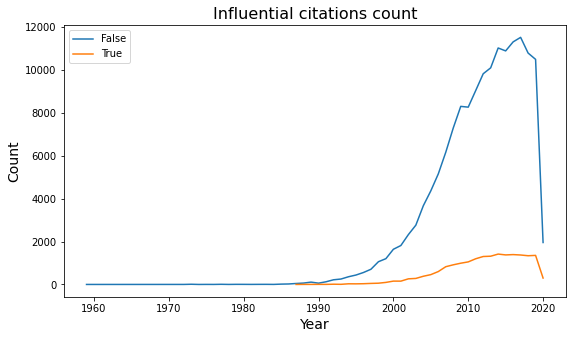

In [0]:
import matplotlib.pyplot as plt

# get columns to plot
columns = count_year.columns.drop('Fraction of influential citations')
# create x data
x_data = count_df.year.unique()
# create figure and axis
fig, ax = plt.subplots(figsize=(9,5))
#ax.figure()
# plot each column
for column in columns:
    
    ax.plot(x_data, count_year[column], label=column)
# set title and legend
ax.set_title('Influential citations count',fontsize = 16)
ax.legend()
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()

## Scatter chart for no.of influential and non-influential citations

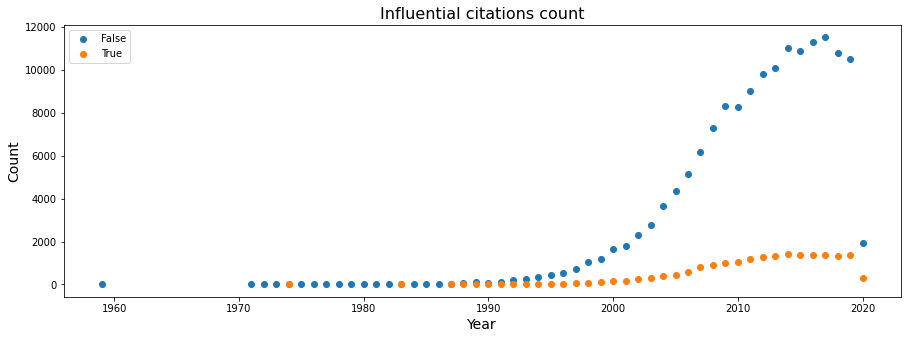

In [0]:
import matplotlib.pyplot as plt
# get columns to plot
columns = count_year.columns.drop('Fraction of influential citations')
# create x data
x_data = count_df.year.unique()
# create figure and axis
fig, ax = plt.subplots(figsize=(15,5))
# plot each column
for column in columns:
    
    ax.scatter(x_data, count_year[column], label=column)
# set title and legend
ax.set_title('Influential citations count',fontsize = 16)
ax.legend()
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()

## Line chart of mean for every five years 

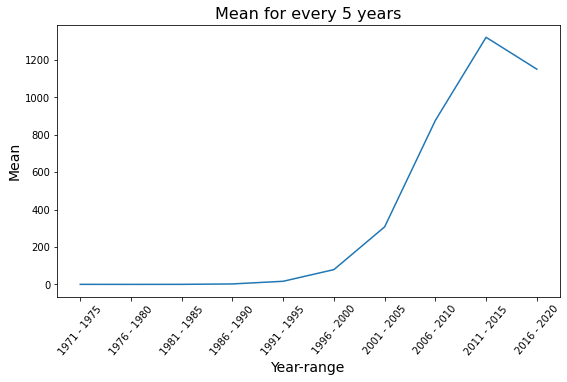

In [0]:
plt.figure(figsize=(9,5))
plt.plot(mean_df['year_range'],mean_df['mean'])
plt.ylabel('Mean',fontsize = 14)
plt.xlabel('Year-range',fontsize = 14)
plt.xticks(rotation = 50)
plt.title('Mean for every 5 years',fontsize = 16)
plt.show()

## Scatter Chart of mean for every five years 

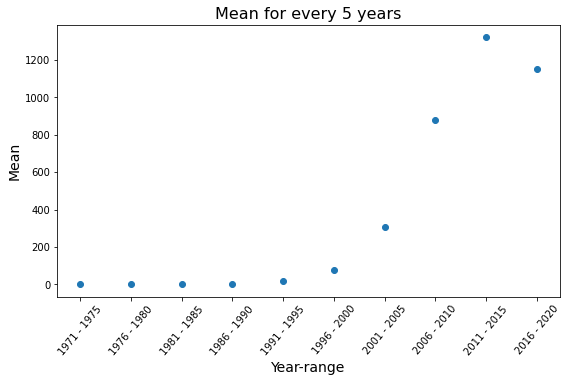

In [0]:
plt.figure(figsize=(9,5))
plt.scatter(mean_df['year_range'],mean_df['mean'])
plt.ylabel('Mean',fontsize = 14)
plt.xlabel('Year-range',fontsize = 14)
plt.xticks(rotation = 50)
plt.title('Mean for every 5 years',fontsize = 16)
plt.show()

## Line Chart for Fraction of influential citations for every 5 years

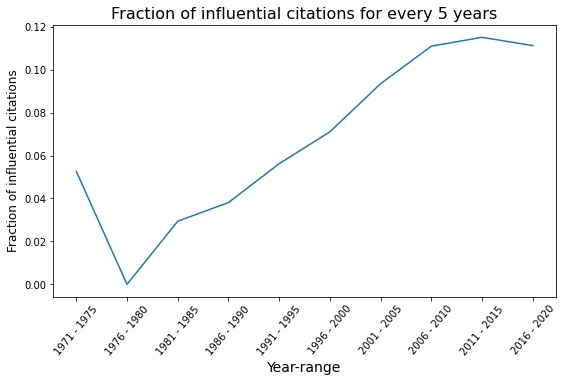

In [0]:
plt.figure(figsize=(9,5))
plt.plot(mean_df['year_range'],mean_df['Fraction of influential citations'])
plt.ylabel('Fraction of influential citations',fontsize = 12)
plt.xlabel('Year-range',fontsize = 14)
plt.xticks(rotation = 50)
plt.title('Fraction of influential citations for every 5 years',fontsize = 16)

plt.show()

## Scatter Chart for Fraction of influential citations for every 5 years

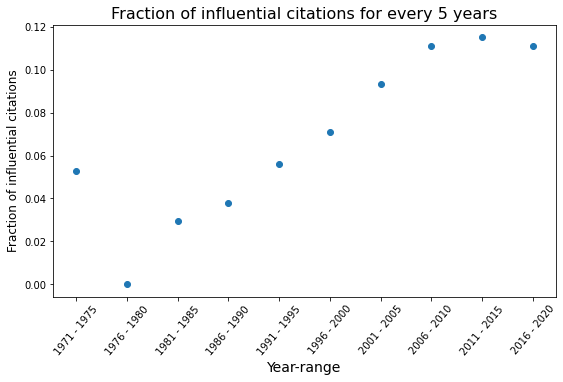

In [0]:
plt.figure(figsize=(9,5))
plt.scatter(mean_df['year_range'],mean_df['Fraction of influential citations'])
plt.ylabel('Fraction of influential citations',fontsize = 12)
plt.xlabel('Year-range',fontsize = 14)
plt.xticks(rotation = 50)
plt.title('Fraction of influential citations for every 5 years',fontsize = 16)

plt.show()

## Line Chart for Fraction of influential citations for every year

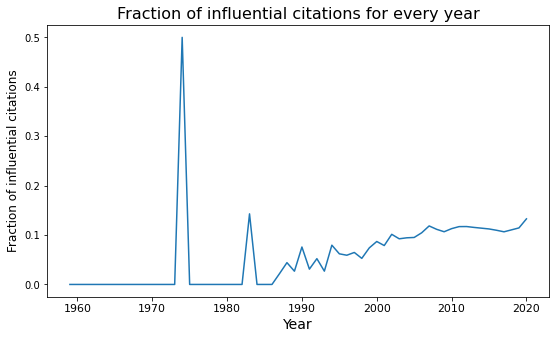

In [0]:
plt.figure(figsize=(9,5))
plt.plot(count_df.year.unique(),count_year['Fraction of influential citations'])
plt.ylabel('Fraction of influential citations',fontsize = 12)
plt.xlabel('Year',fontsize = 14)
plt.xticks(fontsize = 11)
plt.title('Fraction of influential citations for every year',fontsize = 16)

plt.show()

## Scatter Chart for Fraction of influential citations for every years

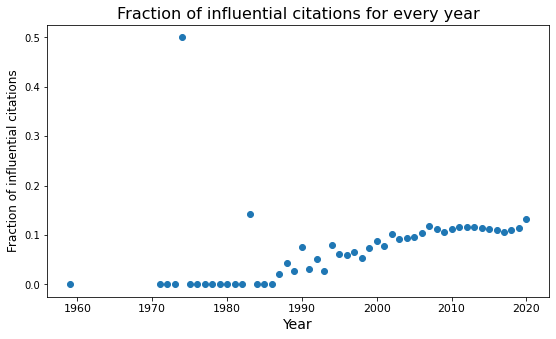

In [0]:
plt.figure(figsize=(9,5))
plt.scatter(count_df.year.unique(),count_year['Fraction of influential citations'])
plt.ylabel('Fraction of influential citations',fontsize = 12)
plt.xlabel('Year',fontsize = 14)
plt.xticks(fontsize = 11)
plt.title('Fraction of influential citations for every year',fontsize = 16)

plt.show()